**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KDTree

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric="minkowski"):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm   
        self.metric = metric

    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        if self.algorithm == "brute":
            if self.metric == "cosine":
                metrics = pairwise_distances(X, self.X, metric="cosine")
            else:
                metrics = pairwise_distances(X, self.X)
            top = np.argpartition(metrics, self.n_neighbors, axis=1)[:,:self.n_neighbors]
            
        elif self.algorithm == "kd_tree":
            if self.metric == "cosine":
                top = KDTree(self.X).query(X, k=self.n_neighbors, metric="cosine", return_distance=False)
            else:
                top = KDTree(self.X).query(X, k=self.n_neighbors, return_distance=False)
                
        labels = np.array([self.y[t] for t in top])
        ans = np.array([np.bincount(l).argmax() for l in labels])
        return ans  

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs(accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred)) < 0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [10]:
%time clf.predict(X_test)

Wall time: 2 ms


array([1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0])

In [11]:
%time my_clf.predict(X_test)

Wall time: 1.99 ms


array([1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 1 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [16]:
%time clf.predict(X_test)

Wall time: 2.99 ms


array([2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0])

In [17]:
%time my_clf.predict(X_test)

Wall time: 994 µs


array([2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0], dtype=int64)

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs(accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred )) < 0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(min_df=0.001, max_df=0.1)
data_vect = count_vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn.model_selection import KFold
iterator = KFold(3)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [23]:
from tqdm.notebook import trange
def find_optimal(scores, test_k, step=1):
    for k in trange(1, test_k + 1, step):
        cv_scores = []
        for train_index, test_index in iterator.split(data_vect):
            test_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute')
            test_clf.fit(data_vect[train_index], target[train_index])
            cv_scores.append(accuracy_score(target[test_index], test_clf.predict(data_vect[test_index])))
        scores.append(np.asarray(cv_scores).mean())
    return np.argmax(scores) + 1

In [24]:
scores = []
test_k = 10
best_k = find_optimal(scores, test_k)

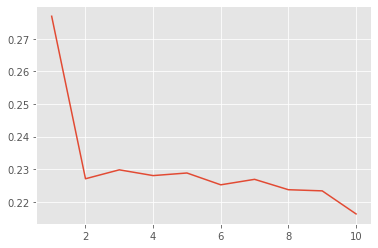

In [25]:
plt.plot(range(1, test_k + 1), scores)
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.001, max_df=0.1)
data_vect = tfidf_vectorizer.fit_transform(data)

In [27]:
def find_optimal_cosine(scores, test_k, step):
    for k in trange(1, test_k + 1, step):
        cv_scores = []
        for train_index, test_index in iterator.split(data_vect):
            test_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute', metric="cosine")
            test_clf.fit(data_vect[train_index], target[train_index])
            cv_scores.append(accuracy_score(target[test_index], test_clf.predict(data_vect[test_index])))
        scores.append(np.asarray(cv_scores).mean())
    return np.argmax(scores) + 1

In [28]:
scores = []
test_k = 200
step = 10
best_k = find_optimal_cosine(scores, test_k, step)

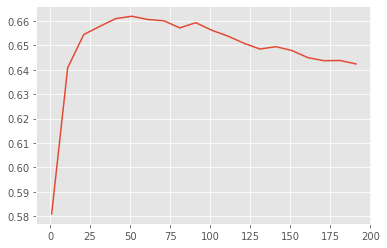

In [29]:
plt.plot(range(1, test_k + 1, step), scores)
plt.show()

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [30]:
newsgroups = fetch_20newsgroups(subset='test', remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [31]:
X_test = tfidf_vectorizer.transform(newsgroups["data"])
y_test = newsgroups["target"]
my_clf = MyKNeighborsClassifier(n_neighbors=best_k, algorithm='brute', metric="cosine")
my_clf.fit(data_vect, target)
print("Accuracy of my classifier:", accuracy_score(y_test, my_clf.predict(X_test)))

Accuracy of my classifier: 0.5469994689325545


**Вывод:** точность лучшей модели на test части датасета отличается от точности на кросс-валидации. Это вероятно связано с тем, что оптимальное число соседей для тренировочной выборки может быть неоптимальным для тестовой